In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2023-02-21 22:35:41.817628: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
X_train.shape  #its 3d array which has 60000 sample of 28 rows and columns

(60000, 28, 28)

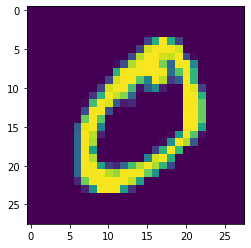

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [5]:
X_train[1]   #as it is neccessary to keep all the value in similar range so we need to divide it buy 255 as it has highest number of value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train = X_train/255
X_test=X_test/255

In [7]:
#NOw we need to make the artifical model which is keras sequential model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #for more then one node you can use the softmax

2023-02-21 22:35:49.313791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [10]:
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2890 - val_loss: 0.1511
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1304 - val_loss: 0.1163
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0899 - val_loss: 0.1094
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0672 - val_loss: 0.1150
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0516 - val_loss: 0.0891


In [11]:
y_prob= model.predict(X_test)


313/313 [==============================] - 0s 1ms/step


In [12]:
y_pred= y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, y_pred)

0.9757

# # Now let us build a convolutional neural network(CNN)to train our images


In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense

In [35]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

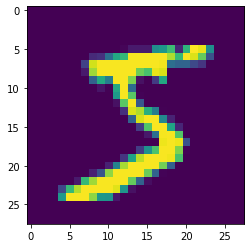

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [38]:
X_train=X_train/255
X_test=X_test/255

In [44]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1590 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0549 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0356 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0175 - accuracy: 0.9945


In [48]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [49]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0483 - accuracy: 0.9854


[0.04832259938120842, 0.9854000210762024]